## ELECTRICITY BILL PREDICTION

##### Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

##### Loading Dataset

##### Dataset containing details about different Indian states,electricty usage and monthly electrity Bill

In [3]:
df = pd.read_csv("electricity_bill_dataset.csv")
df

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4
...,...,...,...,...,...,...,...,...,...,...,...,...
45340,18,22.0,3.0,22.0,1.0,0,9,Ahmedabad,Maha Transco – Maharashtra State Electricity T...,764,7.9,6035.6
45341,23,23.0,2.0,6.0,12.0,0,2,New Delhi,Orient Green,572,8.5,4862.0
45342,22,22.0,2.0,20.0,1.0,0,1,New Delhi,GE T&D India Limited,609,8.5,5176.5
45343,8,21.0,2.0,22.0,7.0,0,12,Ratnagiri,TransRail Lighting,748,7.4,5535.2


In [4]:
df.describe() 

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,MonthlyHours,TariffRate,ElectricityBill
count,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.0,45345.000000,45345.000000,45345.000000,45345.000000
mean,13.990694,21.705458,1.503959,12.502635,2.865057,0.0,6.488058,515.083207,8.369648,4311.771307
std,5.470816,1.672575,1.115482,5.756007,3.894933,0.0,3.443252,122.618017,0.576992,1073.886406
min,5.000000,17.000000,0.000000,3.000000,1.000000,0.0,1.000000,95.000000,7.400000,807.500000
25%,9.000000,22.000000,1.000000,7.000000,1.000000,0.0,3.000000,429.000000,7.900000,3556.800000
50%,14.000000,22.000000,2.000000,13.000000,1.000000,0.0,6.000000,515.000000,8.400000,4299.400000
75%,19.000000,23.000000,2.000000,17.000000,1.000000,0.0,9.000000,601.000000,8.900000,5038.800000
max,23.000000,23.000000,3.000000,22.000000,12.000000,0.0,12.000000,926.000000,9.300000,8286.300000


In [5]:
df.isnull().sum()  # checking if there is any null values in dataset

Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64

In [13]:
max(df["TariffRate"]) # maximum of tariff rate

9.3

In [14]:
demo = ((df["City"] == "Mumbai") & (df["ElectricityBill"])) # Elctricity bill details of Mumbai
df[demo]

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4
11,5,19.0,2.0,20.0,1.0,0,12,Mumbai,Sterlite Power Transmission Ltd,493,9.2,4535.6
20,23,23.0,0.0,15.0,1.0,0,8,Mumbai,Sterlite Power Transmission Ltd,476,9.2,4379.2
31,23,23.0,0.0,9.0,1.0,0,4,Mumbai,Maha Transco – Maharashtra State Electricity T...,412,9.2,3790.4
...,...,...,...,...,...,...,...,...,...,...,...,...
45284,9,17.0,1.0,8.0,1.0,0,1,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),415,9.2,3818.0
45288,8,20.0,0.0,12.0,7.0,0,8,Mumbai,Torrent Power Ltd.,509,9.2,4682.8
45307,9,21.0,0.0,22.0,1.0,0,2,Mumbai,Reliance Power,386,9.2,3551.2
45327,7,21.0,2.0,20.0,7.0,0,3,Mumbai,GE T&D India Limited,583,9.2,5363.6


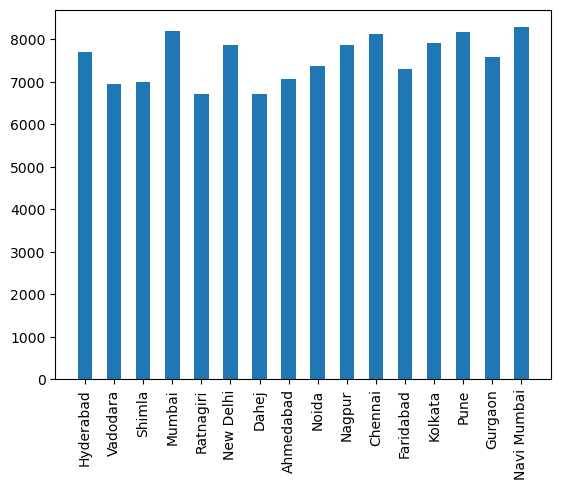

In [8]:
x = df["City"]
y = df["ElectricityBill"]

plt.bar(x,y,width = .5)
plt.xticks(rotation=90)
plt.show()

# city with highest electricity bill is 'Navi Mumbai'

######  City and Monthly usage Hours

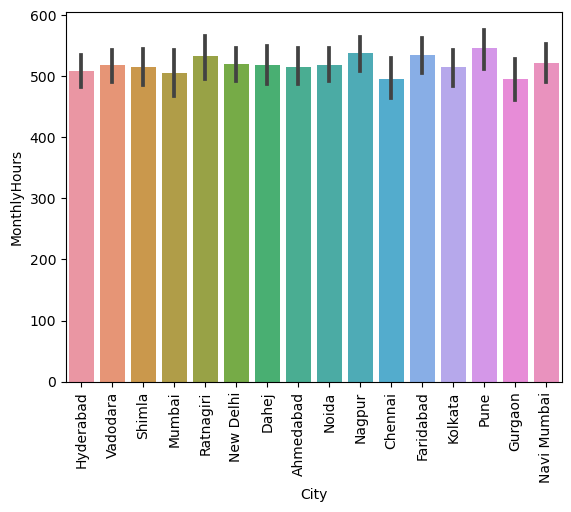

In [37]:
n_df = df.iloc[:1000,:]
m = n_df["City"]
n = n_df["MonthlyHours"]
sns.barplot(x="City",y="MonthlyHours",data=n_df)
plt.xticks(rotation=90)
plt.show()

#####  Coverting String values using Label Encoder

In [11]:
from sklearn.preprocessing import LabelEncoder #importing label encoder 

In [12]:
LE = LabelEncoder() # creating an instance of Label Encoder

In [13]:
df.iloc[:,7] = LE.fit_transform(df.iloc[:,7])
df.iloc[:,8] = LE.fit_transform(df.iloc[:,8])

###### DATASET AFTER LABEL ENCODING

In [14]:
df 

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,5,27,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,15,13,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,14,8,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,7,19,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,7,20,457,9.2,4204.4
...,...,...,...,...,...,...,...,...,...,...,...,...
45340,18,22.0,3.0,22.0,1.0,0,9,0,12,764,7.9,6035.6
45341,23,23.0,2.0,6.0,12.0,0,2,10,18,572,8.5,4862.0
45342,22,22.0,2.0,20.0,1.0,0,1,10,3,609,8.5,5176.5
45343,8,21.0,2.0,22.0,7.0,0,12,13,30,748,7.4,5535.2


In [15]:
correlation = df.corr()

<Axes: >

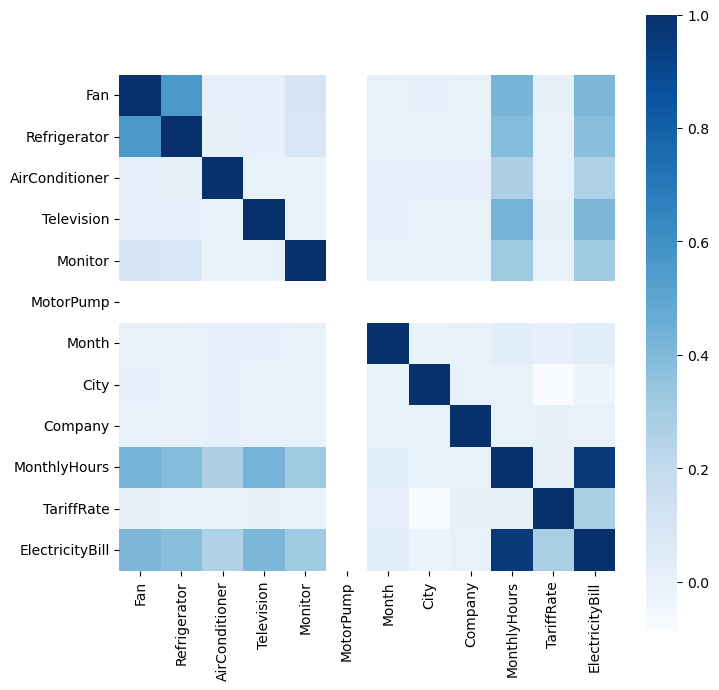

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot_kws={'size':8},cmap='Blues')

#### Spilitting 'features' and 'target' to train and test data 

In [127]:
x = df.drop("ElectricityBill",axis=1)
x

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate
0,16,23.0,2.0,6.0,1.0,0,10,5,27,384,8.4
1,19,22.0,2.0,3.0,1.0,0,5,15,13,488,7.8
2,7,20.0,2.0,6.0,7.0,0,7,14,8,416,7.7
3,7,22.0,3.0,21.0,1.0,0,6,7,19,475,9.2
4,11,23.0,2.0,11.0,1.0,0,2,7,20,457,9.2
...,...,...,...,...,...,...,...,...,...,...,...
45340,18,22.0,3.0,22.0,1.0,0,9,0,12,764,7.9
45341,23,23.0,2.0,6.0,12.0,0,2,10,18,572,8.5
45342,22,22.0,2.0,20.0,1.0,0,1,10,3,609,8.5
45343,8,21.0,2.0,22.0,7.0,0,12,13,30,748,7.4


In [128]:
y = df["ElectricityBill"]
y

0        3225.6
1        3806.4
2        3203.2
3        4370.0
4        4204.4
          ...  
45340    6035.6
45341    4862.0
45342    5176.5
45343    5535.2
45344    3544.1
Name: ElectricityBill, Length: 45345, dtype: float64

###  Data Preprocessing

In [129]:
from sklearn.model_selection import train_test_split

In [205]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42) # splitting features and target as train data and test data

In [131]:
X_train

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate
25952,21,22.0,1.0,18.0,1.0,0,3,11,25,479,8.2
37089,5,20.0,0.0,17.0,1.0,0,9,15,5,290,7.8
24172,22,22.0,1.0,18.0,1.0,0,6,4,13,573,8.3
6754,8,20.0,0.0,21.0,1.0,0,3,0,5,429,7.9
37227,10,18.0,0.0,7.0,1.0,0,2,9,29,270,9.3
...,...,...,...,...,...,...,...,...,...,...,...
11284,5,20.0,0.0,11.0,1.0,0,11,11,18,281,8.2
44732,7,18.0,3.0,14.0,1.0,0,2,6,18,550,8.7
38158,20,22.0,2.0,20.0,12.0,0,12,10,10,814,8.5
860,18,22.0,1.0,5.0,12.0,0,4,1,21,626,8.8


In [132]:
y_train

25952    3927.8
37089    2262.0
24172    4755.9
6754     3389.1
37227    2511.0
          ...  
11284    2304.2
44732    4785.0
38158    6919.0
860      5508.8
15795    5607.0
Name: ElectricityBill, Length: 31741, dtype: float64

In [133]:
X_test

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate
19060,13,23.0,1.0,11.0,12.0,0,4,6,4,581,8.7
17874,16,22.0,2.0,11.0,1.0,0,9,8,28,428,8.9
44423,6,17.0,1.0,21.0,1.0,0,2,4,25,391,8.3
36865,11,22.0,2.0,12.0,12.0,0,1,5,16,682,8.4
36537,15,22.0,3.0,12.0,1.0,0,10,10,11,488,8.5
...,...,...,...,...,...,...,...,...,...,...,...
1530,23,23.0,2.0,7.0,12.0,0,6,5,6,543,8.4
16233,23,22.0,0.0,7.0,12.0,0,4,4,5,526,8.3
2929,10,19.0,3.0,21.0,7.0,0,11,1,9,552,8.8
5799,22,23.0,3.0,21.0,1.0,0,3,8,5,791,8.9


In [134]:
y_test

19060    5054.7
17874    3809.2
44423    3245.3
36865    5728.8
36537    4148.0
          ...  
1530     4561.2
16233    4365.8
2929     4857.6
5799     7039.9
33421    4773.0
Name: ElectricityBill, Length: 13604, dtype: float64

###  LINEAR REGRESSION

In [207]:
from sklearn.linear_model import LinearRegression # importing Linear Regression class

In [208]:
LR = LinearRegression() # creating an instance of linear regression class

In [209]:
LR.fit(X_train,y_train) # training the model using the X_train and y_train data

LinearRegression()

In [211]:
LR_pred = LR.predict(X_test) # making predictions using the model

In [212]:
LR_r2 = r2_score(y_test,LR_pred) # finding the accuracy score of the model prediction
LR_r2 

0.9956348735042119

In [169]:
print(f"r2_score of Linear Regression model is : {LR_r2:2f}")

r2_score of Linear Regression model is : 0.995635


###### Prediction using input values

In [141]:
test_inp = [[16,23.0,2.0,6.0,1.0,0,10,5,27,384,8.4]]
lr_pred1 = LR.predict(test_inp)
lr_pred1

C:\Users\spaka\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3233.04154543])

### DECISION TREE REGRESSION

In [213]:
from sklearn.tree import DecisionTreeRegressor # importing Decision Tree Regression class

In [150]:
DTR = DecisionTreeRegressor() # creating an instance of Decision Tree class

In [151]:
DTR.fit(X_train,y_train) # training the model using the X_train and y_train data

DecisionTreeRegressor()

In [153]:
dtr_pred = DTR.predict(X_test) # making predictions using the model

In [168]:
r2_dtr = r2_score(y_test,dtr_pred) # finding the accuracy score of the model prediction
LR_r2 
print(f"r2 score of Decision Tree Regressor model : {r2_dtr:2f}")

r2 score of Decision Tree Regressor model : 0.999900


### RANDOM FOREST REGRESSION

In [170]:
from sklearn.ensemble import RandomForestRegressor 

In [171]:
RF = RandomForestRegressor()

In [172]:
RF.fit(X_train,y_train)

RandomForestRegressor()

In [173]:
rf_pred = RF.predict(X_test)

In [177]:
r2_rf = r2_score(y_test,rf_pred)
print(f"r2 score of Random Forest Regressor model : {r2_rf:2f}")

r2 score of Random Forest Regressor model : 0.999967


### SUPPORT VECTOR REGRESSION

In [178]:
from sklearn.svm import SVR

In [179]:
svr = SVR(kernel = "linear")

In [180]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [181]:
svr_pred = svr.predict(X_test)

In [183]:
r2_svr = r2_score(y_test,svr_pred)
print(f"r2 score of Support Vector Regressor model : {r2_svr:2f}")

r2 score of Support Vector Regressor model : 0.994981


---

### MODEL COMPARISONS 

In [193]:
z = pd.DataFrame({"ML Models" : ["LINEAR REGRESSION","SVR","DECISION TREE","RANDOM FOREST"],
                 "Accuracy" : [LR_r2,r2_svr,r2_dtr,r2_rf]})
z

,ML Models,Accuracy
0,LINEAR REGRESSION,0.995635
1,SVR,0.994981
2,DECISION TREE,0.999900
3,RANDOM FOREST,0.999967


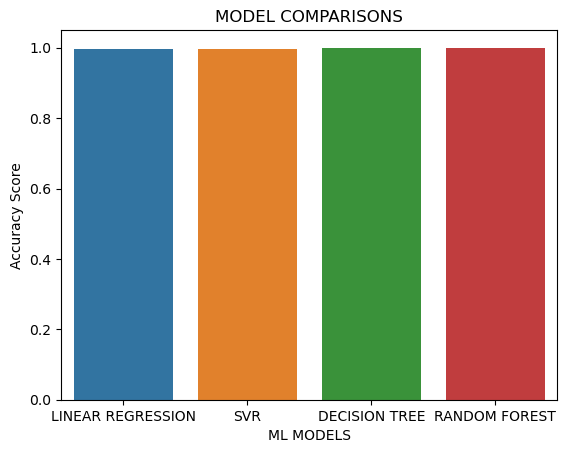

In [192]:
sns.barplot(x="ML Models",y="Accuracy",data=z)
plt.xlabel("ML MODELS")
plt.ylabel("Accuracy Score")
plt.title("MODEL COMPARISONS")
plt.show()

### CONCLUSION

In [215]:
accuracy_scores = [LR_r2,r2_svr,r2_dtr,r2_rf]
max_accuracy = max(accuracy_scores)

In [200]:
print(f"THE MODEL WITH HIGHEST ACCURACY SCORE IS RANDOM FOREST REGRESSOR({r2_rf:2f})")

THE MODEL WITH HIGHEST ACCURACY SCORE IS RANDOM FOREST REGRESSOR(0.999967)


In [217]:
models ={"LINEAR REGRESSION":LR_r2,"SVR":r2_svr,"DECISION TREE REGRESSOR":r2_dtr,"RANDOM FOREST REGRESSOR":r2_rf}
print(f"The Model With Highest Accuracy Score is {max(models,key=models.get)}")

The Model With Highest Accuracy Score is RANDOM FOREST REGRESSOR
